<div style="background-color: #f0f8ff; padding: 15px; border-left: 6px solid #1e90ff; border-radius: 6px; color: black;">
  <h3> Partie Machine Learning – Analyse du sommeil</h3>

  <p>
    Dans cette partie, nous utilisons des techniques de <b>Machine Learning</b> 
    afin d’exploiter les données du dataset 
    <i>Sleep Health and Lifestyle</i>.
  </p>

  <p>
    Après avoir réalisé une <b>analyse statistique descriptive</b> 
    (moyenne, variance, écart-type, intervalles de confiance), 
    l’objectif est maintenant de passer à une approche 
    <b>prédictive</b>.
  </p>

  <p>
    Le Machine Learning permet d’analyser automatiquement l’impact de plusieurs 
    facteurs liés au mode de vie (niveau de stress, activité physique, âge, etc.) 
    sur la <b>qualité du sommeil</b>.
  </p>

  <p>
     <b>Objectif principal :</b><br>
    Prédire la <b>qualité du sommeil</b> d’un individu à partir de ses 
    caractéristiques personnelles et de son mode de vie.
  </p>
</div>



<div style="background-color: #fffaf0; padding: 15px; border-left: 6px solid #ffa500; border-radius: 6px; color: black;">
  <h3> Problématique Machine Learning</h3>

  <p>
    La problématique étudiée dans cette partie est la suivante :
  </p>

  <p style="font-style: italic; margin-left: 15px;">
    Peut-on prédire la qualité du sommeil d’une personne à partir de ses habitudes 
    de vie et de ses caractéristiques physiologiques ?
  </p>

  <p>
    Il s’agit d’un <b>problème de classification</b>, car la variable cible 
    (<b>Sleep Quality</b>) prend des valeurs qualitatives 
    (par exemple : bonne ou mauvaise qualité de sommeil).
  </p>
</div>


<div style="background-color: #f0fff0; padding: 15px; border-left: 6px solid #32cd32; border-radius: 6px; color: black;">
  <h3>Étape 1 : Chargement et compréhension des données</h3>

 


In [32]:
import pandas as pd

# Chemin vers le dataset
dataset_path = "C:/Users/wafae/Desktop/sleep_health_stat_project/data/Sleep_health_and_lifestyle_dataset.csv"

# Chargement du dataset
data = pd.read_csv(dataset_path)

# Afficher les premières lignes
data.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [33]:
# Informations générales sur le dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


<div style="background-color: #f0f8ff; padding: 10px; border-left: 5px solid #1e90ff; border-radius: 5px; color: black;">
<b>Explication :</b><br>
La colonne <b>Sleep Disorder</b> contient certaines valeurs manquantes (NaN) dans le dataset.<br>
Pour pouvoir utiliser cette variable dans le Machine Learning, nous remplaçons ces valeurs manquantes par <b>"Unknown"</b>.<br>
Ainsi, toutes les lignes ont désormais une valeur valide et cela évite des erreurs lors de l'entraînement des modèles.
</div>


In [34]:
 # Remplacer les valeurs manquantes par "Unknown"
data['Sleep Disorder'] = data['Sleep Disorder'].fillna("Unknown")
data['Sleep Disorder'].isnull().sum()
 

np.int64(0)

In [35]:
# Séparer les variables numériques et catégorielles
numerical_features = data.select_dtypes(include=['int64', 'float64'])
categorical_features = data.select_dtypes(include=['object'])

# Afficher les colonnes numériques
print("Colonnes numériques :")
print(numerical_features.columns, "\n")

# Afficher les colonnes catégorielles
print("Colonnes catégorielles :")
print(categorical_features.columns, "\n")
#  afficher un aperçu des valeurs
print("Aperçu des valeurs numériques :\n", numerical_features.head(), "\n")
print("Aperçu des valeurs catégorielles :\n", categorical_features.head())

Colonnes numériques :
Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object') 

Colonnes catégorielles :
Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object') 

Aperçu des valeurs numériques :
    Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0          1   27             6.1                 6                       42   
1          2   28             6.2                 6                       60   
2          3   28             6.2                 6                       60   
3          4   28             5.9                 4                       30   
4          5   28             5.9                 4                       30   

   Stress Level  Heart Rate  Daily Steps  
0             6          77         4200  
1             8          75        10000  
2             8          7

<div style="background-color: #f0f8ff; padding: 10px; border-left: 5px solid #1e90ff; border-radius: 5px; color: black;">
<b>Explication :</b><br>
- Nous distinguons les variables <b>numériques</b> des variables <b>catégorielles</b> pour adapter le pré-traitement.<br>
- Les variables numériques (<b>Age, Sleep Duration, Stress Level, etc.</b>) pourront être normalisées ou utilisées directement.<br>
- Les variables catégorielles (<b>Gender, BMI Category, Occupation, Sleep Disorder</b>) nécessitent un encodage en variables numériques (<b>One-Hot Encoding</b>) pour être utilisées dans les modèles de Machine Learning.
</div>


In [36]:
import pandas as pd

# Sélection des colonnes numériques
num_cols = ['Age','Sleep Duration','Physical Activity Level','Stress Level','Heart Rate','Daily Steps']

# Fonction pour détecter les outliers
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    return outliers

# Vérifier les outliers pour chaque colonne
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col} - Nombre de valeurs aberrantes : {len(outliers)}")
    if len(outliers) > 0:
        print(outliers.values)
    print("-"*50)


Age - Nombre de valeurs aberrantes : 0
--------------------------------------------------
Sleep Duration - Nombre de valeurs aberrantes : 0
--------------------------------------------------
Physical Activity Level - Nombre de valeurs aberrantes : 0
--------------------------------------------------
Stress Level - Nombre de valeurs aberrantes : 0
--------------------------------------------------
Heart Rate - Nombre de valeurs aberrantes : 15
[85 85 85 82 80 80 81 81 84 84 80 83 83 86 86]
--------------------------------------------------
Daily Steps - Nombre de valeurs aberrantes : 0
--------------------------------------------------


<h3>🔹 Valeurs aberrantes (Outliers)</h3>
<p>
Les valeurs aberrantes sont des observations qui s’écartent statistiquement du reste des données.
Elles ne représentent pas nécessairement des erreurs, mais peuvent refléter une variabilité naturelle
du phénomène étudié.
</p>

<p>
La détection des outliers a été réalisée à l’aide de la méthode de l’Intervalle Interquartile (IQR)
sur les variables numériques du dataset.
</p>

<p>
Les résultats montrent l’absence de valeurs aberrantes pour la majorité des variables
(Age, Sleep Duration, Physical Activity Level, Stress Level et Daily Steps).
Cependant, <b>15 valeurs ont été détectées comme potentiellement aberrantes</b> pour la variable
<b>Heart Rate</b>.
</p>

<p>
Après analyse, ces valeurs (comprises entre 80 et 86 battements par minute) correspondent à des
fréquences cardiaques physiologiquement normales chez l’adulte.
Elles ne résultent pas d’erreurs de saisie mais reflètent une variabilité réelle des données.
</p>

<p>
Par conséquent, aucune suppression n’a été effectuée.
De plus, l’application de la normalisation (StandardScaler) permet de réduire l’impact de ces valeurs
sur l’apprentissage des modèles de Machine Learning.
</p>



In [37]:
import pandas as pd

# Copier le dataset pour ne pas écraser l'original
data_ml = data.copy()

# Créer la variable cible catégorielle
def sleep_quality_category(score):
    if score <= 4:
        return "Poor"
    elif score <= 7:
        return "Average"
    else:
        return "Good"

data_ml['Sleep_Quality_Category'] = data_ml['Quality of Sleep'].apply(sleep_quality_category)

# Vérifier le résultat
print(data_ml[['Quality of Sleep', 'Sleep_Quality_Category']].head(10))

# Compter le nombre d'observations par catégorie
print("\nRépartition des catégories :")
print(data_ml['Sleep_Quality_Category'].value_counts())


   Quality of Sleep Sleep_Quality_Category
0                 6                Average
1                 6                Average
2                 6                Average
3                 4                   Poor
4                 4                   Poor
5                 4                   Poor
6                 6                Average
7                 7                Average
8                 7                Average
9                 7                Average

Répartition des catégories :
Sleep_Quality_Category
Average    189
Good       180
Poor         5
Name: count, dtype: int64


<div style="background-color: #f0f8ff; padding: 15px; border-left: 6px solid #1e90ff; border-radius: 6px; color: black;">
  <h3> Définition de la variable cible (Target)</h3>

  <p>
    Dans ce projet, la variable <b>Quality of Sleep</b> est initialement exprimée sous forme 
    d’un <b>score numérique</b> allant de 1 à 10.
  </p>

  <p>
    Afin d’adapter cette variable à un <b>problème de Machine Learning supervisé</b> de type 
    <b>classification</b>, ce score a été transformé en <b>catégories</b> :
  </p>

  <ul style="margin-left: 20px;">
    <li><b>Poor</b> : mauvaise qualité de sommeil (score ≤ 4)</li>
    <li><b>Average</b> : qualité moyenne du sommeil (score entre 5 et 7)</li>
    <li><b>Good</b> : bonne qualité de sommeil (score ≥ 8)</li>
  </ul>

  <p>
    Cette nouvelle variable, appelée <b>Sleep_Quality_Category</b>, constitue la 
    <b>variable cible (y)</b> du modèle.
  </p>

  <p>
    L’objectif du modèle est donc d’apprendre la relation entre les 
    <b>habitudes de vie</b> (âge, stress, activité physique, durée du sommeil, etc.) 
    et la <b>qualité du sommeil</b>, afin de prédire automatiquement la catégorie 
    correspondante.
  </p>
</div>


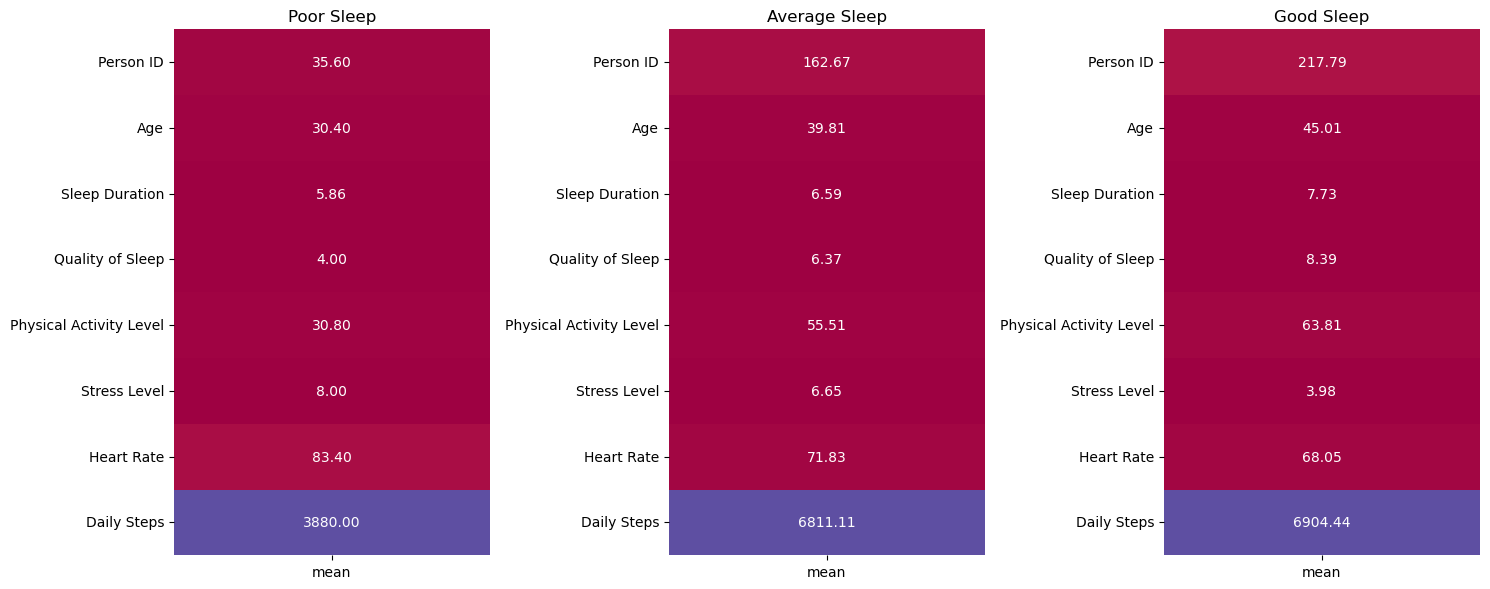

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Séparer les groupes selon Sleep Quality
Poor = data_ml[data_ml["Sleep_Quality_Category"] == "Poor"].describe().T
Average = data_ml[data_ml["Sleep_Quality_Category"] == "Average"].describe().T
Good = data_ml[data_ml["Sleep_Quality_Category"] == "Good"].describe().T

colors = "Spectral"

# Créer une figure avec 3 sous-graphes
fig, axes = plt.subplots(1, 3, figsize=(15,6))

sns.heatmap(Poor[["mean"]], annot=True, cmap=colors, cbar=False, fmt=".2f", ax=axes[0])
axes[0].set_title("Poor Sleep")

sns.heatmap(Average[["mean"]], annot=True, cmap=colors, cbar=False, fmt=".2f", ax=axes[1])
axes[1].set_title("Average Sleep")

sns.heatmap(Good[["mean"]], annot=True, cmap=colors, cbar=False, fmt=".2f", ax=axes[2])
axes[2].set_title("Good Sleep")

plt.tight_layout()
plt.show()


<div style="background-color: #f0f8ff; padding: 15px; border-left: 6px solid #1e90ff; border-radius: 6px; color: black;">

<h3>🔹 Heatmap des moyennes par qualité du sommeil</h3>

<p>
Le code ci-dessus permet de visualiser les différences des variables numériques en fonction de la <b>qualité du sommeil</b> :
</p>

<ul>
<li><b>Étape 1 :</b> Séparer les données en trois groupes : Poor, Average, Good Sleep.</li>
<li><b>Étape 2 :</b> Calculer les statistiques descriptives (moyenne, min, max, etc.) pour chaque groupe et les transposer avec <code>.describe().T</code>.</li>
<li><b>Étape 3 :</b> Créer un graphique avec <code>matplotlib</code> et <code>seaborn</code> contenant <b>trois heatmaps</b>, une pour chaque groupe.</li>
<li><b>Étape 4 :</b> Chaque heatmap montre la <b>moyenne</b> de chaque variable numérique pour ce groupe de sommeil.</li>
</ul>

<p>
<b>Intérêt :</b> Ce graphique permet de <b>comparer rapidement les valeurs moyennes</b> des différentes variables entre les catégories de sommeil.  
Par exemple, on peut visualiser si le stress ou l’activité physique influence la qualité du sommeil.  
C’est un outil précieux pour l’<b>analyse exploratoire des données (EDA)</b> avant l’entraînement d’un modèle de Machine Learning.
</p>

</div>


In [39]:
# Copier le dataset
data_encoded_ml = data_ml.copy()


# Colonnes catégorielles à encoder
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

# Encodage One-Hot
data_encoded_ml = pd.get_dummies(
    data_encoded_ml, 
    columns=categorical_cols, 
    drop_first=True
)

# Vérifier le résultat
data_encoded_ml.head()




,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep_Quality_Category,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Sleep Apnea,Sleep Disorder_Unknown
0,1,27,6.1,6,42,6,126/83,77,4200,Average,...,False,False,False,True,False,False,False,True,False,True
1,2,28,6.2,6,60,8,125/80,75,10000,Average,...,False,False,False,False,False,False,False,False,False,True
2,3,28,6.2,6,60,8,125/80,75,10000,Average,...,False,False,False,False,False,False,False,False,False,True
3,4,28,5.9,4,30,8,140/90,85,3000,Poor,...,True,False,False,False,False,False,True,False,True,False
4,5,28,5.9,4,30,8,140/90,85,3000,Poor,...,True,False,False,False,False,False,True,False,True,False


In [40]:
# Supprimer les colonnes non numériques
data_encoded_ml = data_encoded_ml.drop(columns=["Person ID", "Blood Pressure", "Quality of Sleep"])

# Vérifier les types
print(data_encoded_ml.dtypes)


Age                                  int64
Sleep Duration                     float64
Physical Activity Level              int64
Stress Level                         int64
Heart Rate                           int64
Daily Steps                          int64
Sleep_Quality_Category              object
Gender_Male                           bool
Occupation_Doctor                     bool
Occupation_Engineer                   bool
Occupation_Lawyer                     bool
Occupation_Manager                    bool
Occupation_Nurse                      bool
Occupation_Sales Representative       bool
Occupation_Salesperson                bool
Occupation_Scientist                  bool
Occupation_Software Engineer          bool
Occupation_Teacher                    bool
BMI Category_Normal Weight            bool
BMI Category_Obese                    bool
BMI Category_Overweight               bool
Sleep Disorder_Sleep Apnea            bool
Sleep Disorder_Unknown                bool
dtype: obje

<div style="background-color: #f5fffa; padding: 15px; border-left: 6px solid #2e8b57; border-radius: 6px; color: black;">
  <h3> Encodage des variables catégorielles</h3>

  <p>
    Les algorithmes de Machine Learning ne peuvent traiter que des <b>valeurs numériques</b>.
    Or, certaines variables du dataset sont <b>catégorielles</b> (texte).
  </p>

  <p>
    L’encodage permet de transformer ces catégories en <b>variables numériques</b> afin
    qu’elles puissent être utilisées par les modèles.
  </p>

  <p>
    Le <b>One-Hot Encoding</b> est utilisé car il ne crée pas de relation d’ordre entre
    les catégories et convient parfaitement aux modèles de classification.
  </p>

  <p>
    Cette étape est indispensable pour assurer un <b>apprentissage correct</b> et des
    <b>prédictions fiables</b>.
  </p>
</div>


In [43]:
num_cols = [
    'Age',
    'Sleep Duration',
    'Physical Activity Level',
    'Stress Level',
    'Heart Rate',
    'Daily Steps'
]


In [52]:
from sklearn.preprocessing import StandardScaler

# Copier le dataset encodé
data_normalized = data_encoded_ml.copy()

# Initialiser le scaler

scaler = StandardScaler()

# Appliquer la normalisation uniquement aux colonnes numériques
data_normalized[num_cols] = scaler.fit_transform(data_normalized[num_cols])


# Vérifier le résultat
data_normalized[num_cols].head()

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,-1.753096,-1.298887,-0.825418,0.347021,1.654719,-1.619584
1,-1.637643,-1.173036,0.039844,1.475592,1.170474,1.970077
2,-1.637643,-1.173036,0.039844,1.475592,1.170474,1.970077
3,-1.637643,-1.550588,-1.402260,1.475592,3.591698,-2.362273
4,-1.637643,-1.550588,-1.402260,1.475592,3.591698,-2.362273


<div style="background-color: #fff5f5; padding: 15px; border-left: 6px solid #dc143c; border-radius: 6px; color: black;">
  <h3>Interprétation des données normalisées</h3>

  <p>
    Après l’application de la normalisation avec <b>StandardScaler</b>, les variables
    numériques ont une moyenne proche de 0 et un écart-type égal à 1.
  </p>

  <p>
    Les valeurs négatives indiquent que l’observation est inférieure à la moyenne,
    tandis que les valeurs positives indiquent une observation supérieure à la moyenne.
  </p>

  <p>
    Cette transformation facilite l’apprentissage des algorithmes de Machine Learning
    et garantit une contribution équilibrée de chaque variable.
  </p>
</div>


In [46]:
from sklearn.model_selection import train_test_split

# Variables explicatives (features)
X = data_encoded_ml.drop(['Sleep_Quality_Category'], axis=1)

# Variable cible (target)
y = data_encoded_ml['Sleep_Quality_Category']

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Vérification des dimensions
print("Taille X_train :", X_train.shape)
print("Taille X_test  :", X_test.shape)
print("Taille y_train :", y_train.shape)
print("Taille y_test  :", y_test.shape)


Taille X_train : (299, 22)
Taille X_test  : (75, 22)
Taille y_train : (299,)
Taille y_test  : (75,)


<div style="background-color: #f7fbff; padding: 18px; border-left: 6px solid #1e90ff; border-radius: 8px; color: black;">

<h3> Séparation des données : Entraînement et Test</h3>

<p>
Avant d’entraîner un modèle de Machine Learning, le jeu de données a été
<b>divisé en deux parties distinctes</b> afin d’évaluer correctement ses performances.
</p>

<p>
<b>80&nbsp;% des données</b> ont été utilisées comme <b>données d’entraînement (training set)</b>.
Ces données permettent au modèle d’apprendre les relations entre les variables
explicatives (âge, durée du sommeil, niveau de stress, activité physique, etc.)
et la variable cible <i>Sleep_Quality_Category</i>.
</p>

<p>
Les <b>20&nbsp;% restants</b> constituent le <b>jeu de test (test set)</b>.
Ces données ne sont jamais vues par le modèle durant l’apprentissage.
Elles servent uniquement à <b>évaluer la capacité de généralisation</b> du modèle
sur de nouvelles observations.
</p>

<p>
Cette séparation permet d’éviter le <b>sur-apprentissage (overfitting)</b>,
c’est-à-dire une situation où le modèle mémorise les données d’entraînement
sans être capable de prédire correctement sur des données inédites.
</p>



</div>


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:
#Définir X et y
# X : toutes les colonnes sauf la target
X = data_encoded_ml.drop(columns=["Sleep_Quality_Category"])

# y : variable cible
y = data_encoded_ml["Sleep_Quality_Category"]
#X contient toutes les informations que le modèle va utiliser pour prédire la qualité du sommeil
#y est ce qu’on veut prédire : Poor, Average, Good
print(X.dtypes)

Age                                  int64
Sleep Duration                     float64
Physical Activity Level              int64
Stress Level                         int64
Heart Rate                           int64
Daily Steps                          int64
Gender_Male                           bool
Occupation_Doctor                     bool
Occupation_Engineer                   bool
Occupation_Lawyer                     bool
Occupation_Manager                    bool
Occupation_Nurse                      bool
Occupation_Sales Representative       bool
Occupation_Salesperson                bool
Occupation_Scientist                  bool
Occupation_Software Engineer          bool
Occupation_Teacher                    bool
BMI Category_Normal Weight            bool
BMI Category_Obese                    bool
BMI Category_Overweight               bool
Sleep Disorder_Sleep Apnea            bool
Sleep Disorder_Unknown                bool
dtype: object


In [49]:
#Séparer en train et test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#test_size=0.2 → 20 % des données pour tester, 80 % pour entraîner
#random_state=42 → permet de reproduire les résultats
#stratify=y → conserve la proportion des catégories Poor/Average/Good dans train et test

In [50]:
#Créer et entraîner le modèle
# Créer le modèle
model = LogisticRegression(max_iter=1000)

# Entraîner sur X_train et y_train
model.fit(X_train, y_train)

c:\Users\wafae\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [29]:
print(X_train.dtypes)

Age                                  int64
Sleep Duration                     float64
Physical Activity Level              int64
Stress Level                         int64
Heart Rate                           int64
Daily Steps                          int64
Gender_Male                           bool
Occupation_Doctor                     bool
Occupation_Engineer                   bool
Occupation_Lawyer                     bool
Occupation_Manager                    bool
Occupation_Nurse                      bool
Occupation_Sales Representative       bool
Occupation_Salesperson                bool
Occupation_Scientist                  bool
Occupation_Software Engineer          bool
Occupation_Teacher                    bool
BMI Category_Normal Weight            bool
BMI Category_Obese                    bool
BMI Category_Overweight               bool
Sleep Disorder_Sleep Apnea            bool
Sleep Disorder_Unknown                bool
dtype: object


In [ ]:
#Faire des prédictions
y_pred = model.predict(X_test)
#X_test = données jamais vues par le modèle
#y_pred = prédictions du modèle

In [ ]:
#Évaluer les performances


✔️ Accuracy

In [ ]:
#L’accuracy mesure :
#le pourcentage total de prédictions correctes
from sklearn.metrics import accuracy_score
print("Accuracy :", accuracy_score(y_test, y_pred))
#Le modèle est très performant globalement

Accuracy : 0.9866666666666667


<h3>Accuracy du modèle</h3>

<p>
L’<strong>accuracy</strong> mesure le pourcentage total de prédictions correctement réalisées
par le modèle. Elle permet d’évaluer la performance globale du modèle sur l’ensemble
des données de test.
</p>

<p>
Dans notre cas, le modèle de régression logistique atteint une
<strong>accuracy de 98,67&nbsp;%</strong>, ce qui signifie que la grande majorité des observations
ont été correctement classées.
</p>

<p>
Ce résultat indique une excellente capacité globale de prédiction de la qualité du sommeil.
</p>



✔️ Rapport de classification

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       1.00      0.97      0.99        38
        Good       0.97      1.00      0.99        36
        Poor       1.00      1.00      1.00         1

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



<h3>Rapport de classification</h3>

<p>
Le rapport de classification fournit une évaluation détaillée des performances du modèle
pour chaque catégorie de qualité du sommeil :
<strong>Poor</strong>, <strong>Average</strong> et <strong>Good</strong>.
</p>

<p>
Les métriques de <em>précision</em> (precision) et de <em>rappel</em> (recall) montrent que les classes
<strong>Average</strong> et <strong>Good</strong> sont prédites avec une très grande fiabilité.
</p>

<p>
La classe <strong>Poor</strong> est également correctement identifiée, bien qu’elle soit faiblement
représentée dans le jeu de données, ce qui limite l’analyse statistique sur cette catégorie.
</p>

<p>
Ces résultats indiquent que le modèle est équilibré et performant pour distinguer les
différents niveaux de qualité du sommeil.
</p>


Matrice de confusion

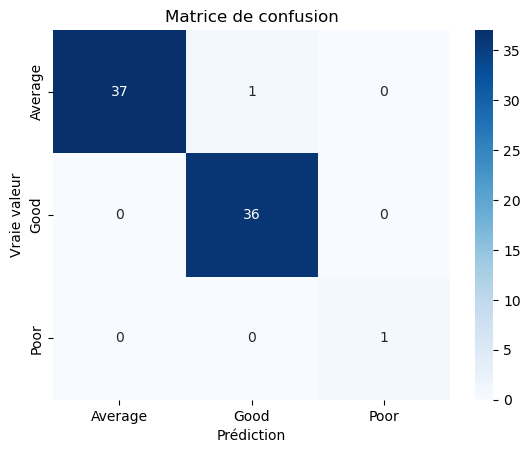

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Prédiction")
plt.ylabel("Vraie valeur")
plt.title("Matrice de confusion")
plt.show()
#Elle montre où le modèle se trompe.
#Diagonale = bonnes prédictions 
#Hors diagonale = erreurs 


<h3>Matrice de confusion</h3>

<p>
La matrice de confusion permet de visualiser les performances du modèle en comparant
les valeurs réelles aux valeurs prédites.
</p>

<p>
Les valeurs situées sur la diagonale principale représentent les prédictions correctes,
tandis que les valeurs en dehors de la diagonale correspondent aux erreurs de classification.
</p>

<p>
Dans notre étude, la matrice de confusion montre que la majorité des observations sont
correctement classées, avec très peu de confusions entre les catégories.
</p>

<p>
Cela confirme la bonne capacité du modèle à distinguer les différents niveaux de
qualité du sommeil.
</p>


<h3 style="color:#4da6ff;">🔹 Résultats de la régression logistique</h3>

<p style="color:#e0e0e0;">
Le modèle de <b style="color:#ffd166;">régression logistique</b> a été utilisé pour prédire la 
<b style="color:#06d6a0;">qualité du sommeil</b> des individus 
(<b style="color:#ef476f;">Poor</b>, 
<b style="color:#ffd166;">Average</b>, 
<b style="color:#4da6ff;">Good</b>) à partir des variables liées au mode de vie et à la santé.
</p>

<p style="color:#e0e0e0;">
Les résultats obtenus montrent une <b style="color:#06d6a0;">excellente performance</b> du modèle :
</p>

<ul style="color:#e0e0e0;">
  <li>
    <b style="color:#06d6a0;">Accuracy :</b> 
    <span style="color:#ffffff;">98,67 %</span>, indiquant que la majorité des prédictions sont correctes.
  </li>
  <li>
    Les classes <b style="color:#ffd166;">Average</b> et 
    <b style="color:#4da6ff;">Good</b> sont prédites avec une précision et un rappel très élevés.
  </li>
  <li>
    La classe <b style="color:#ef476f;">Poor</b> est correctement identifiée, malgré sa faible représentation dans le dataset.
  </li>
</ul>

<p style="color:#e0e0e0;">
La <b style="color:#c77dff;">matrice de confusion</b> montre très peu d’erreurs de classification, 
ce qui confirme la capacité du modèle à <b style="color:#06d6a0;">bien généraliser</b> sur de nouvelles données.
</p>

<p style="color:#06d6a0;">
<b>Conclusion :</b> La régression logistique est un modèle fiable et performant pour la prédiction 
de la qualité du sommeil dans ce projet.
</p>

